# I. Creating a Linear Regression

This part aims to perform a linear regression using the minutes_watched column as a predictor and certificates_issued as a target.

Note: 20% of the data will be used as a test set.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

## Data import

In [2]:
raw_data = pd.read_csv('minutes_and_certificates.csv')

## Copy the data

In [3]:
data = raw_data.copy()

## Data preview

In [4]:
data.head()

,student_id,certificates_issued,minutes_watched
0,4640,1,586.80
1,5836,3,1903.12
2,9754,1,702.77
3,801,13,6066.00
4,2022,1,115.37


## Data description

In [5]:
data.describe()

,student_id,certificates_issued,minutes_watched
count,658.000000,658.000000,658.000000
mean,211208.088146,2.661094,877.773754
std,84231.181668,2.863571,846.600006
min,6.000000,1.000000,0.000000
25%,165566.750000,1.000000,330.800000
50%,257267.500000,2.000000,629.590000
75%,269534.750000,3.000000,1179.067500
max,279766.000000,35.000000,6464.820000


In [6]:
data.isnull().sum()

student_id             0
certificates_issued    0
minutes_watched        0
dtype: int64

We have don't have any some missing values in any of the columns

## Define the input and target variables

In [7]:
target = data['certificates_issued'] 
inputs = data['minutes_watched']

## Split the data into training and testing sets

In [8]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

## Reshape the data

In [9]:
x_train = x_train.to_numpy() 
x_test = x_test.to_numpy() 
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy() 

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [10]:
np.isnan(x_train).sum()

0

## Create and train the model

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(x_train,y_train)

LinearRegression()

## Linear equation

In [13]:
reg.intercept_, reg.coef_

(1.0564011871197372, array([0.00174037]))

In [14]:
print(f"Linear equation: y = {reg.intercept_:.3f} + {reg.coef_[0]:.5f}x")

Linear equation: y = 1.056 + 0.00174x


## Calculating the R-squared

In [15]:
reg.score(x_train,y_train)

0.3052942915158896

The value we obtained is approximately 0.305. This suggests that about 30% of the variability in the target variable (the number of certificates issued) is explained by the input variable (the number of minutes watched). This model does not account for the other 70%.

An R-squared value of 0.305 is not a bad result, but, it implies that other factors also play a role in the number of certificates issued. Some other factors might be:

- One such factor, for example, includes different courses with different lengths. Therefore, a student passing three short courses will be issued three certificates, while a student passing one long course—roughly the length of three short ones—will be given only one certificate.
- Another factor could be that some students pass exams without watching the courses. The reason could be that they are familiar with the subject and only aim for a document proving their proficiency.

The model, therefore, provides some insight into the relationship between these two quantities, but there’s still a large portion of the variance that remains unexplained. The number of minutes watched is reasonable to include when predicting the number of certificates issued but should not be the sole factor considered. 

## Prediction

In [16]:
y_hat_test = reg.predict(x_test)

In [17]:
reg.predict([[1200]])

array([3.14485052])

## Visualization

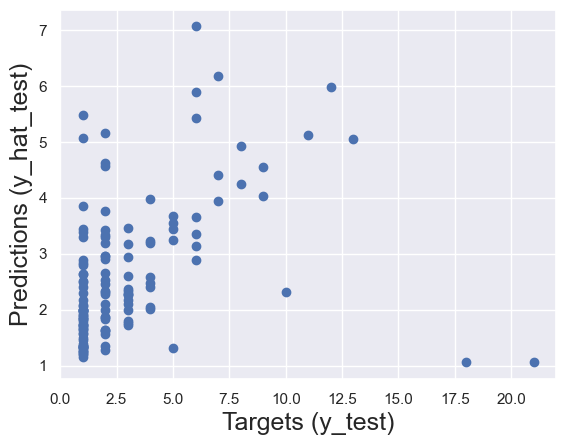

In [18]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.show()

## Measure prediction performance

In [19]:
y_test = pd.Series(y_test)
y_hat_test = pd.Series(y_hat_test)

In [20]:
df_pf = pd.DataFrame(y_hat_test, columns = ['Prediction'])
df_pf.head()

,Prediction
0,1.729143
1,2.653056
2,1.826917
3,2.262185
4,2.164967


In [21]:
df_pf['Target'] = y_test
df_pf.head()

,Prediction,Target
0,1.729143,3
1,2.653056,2
2,1.826917,2
3,2.262185,3
4,2.164967,1


In [22]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf.head()

,Prediction,Target,Residual
0,1.729143,3,1.270857
1,2.653056,2,-0.653056
2,1.826917,2,0.173083
3,2.262185,3,0.737815
4,2.164967,1,-1.164967


In [23]:
df_pf['Difference%'] = abs(df_pf['Residual'] / df_pf['Target'] * 100)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,1.729143,3,1.270857,42.361902
1,2.653056,2,-0.653056,32.652775
2,1.826917,2,0.173083,8.654142
3,2.262185,3,0.737815,24.593840
4,2.164967,1,-1.164967,116.496750


In [24]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,132.000000,132.00000,132.000000,132.000000
mean,2.615977,3.00000,0.384023,67.242808
std,1.239119,3.21732,2.986903,70.025485
min,1.056401,1.00000,-4.482139,0.526593
25%,1.731767,1.00000,-0.963995,25.231949
50%,2.282164,2.00000,-0.316596,45.906445
75%,3.251923,3.25000,0.812117,85.677764
max,7.057595,21.00000,19.943599,448.213859


Looking at 25%, 50%, and 75, we can still see some relevant difference%, this confirms our previous R-squared of around 30% meaning that our model has not been able to fully describe all of the variance

In [25]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'], ascending=False)

,Prediction,Target,Residual,Difference%
23,5.48,1,-4.48,448.21
122,5.07,1,-4.07,406.96
89,3.86,1,-2.86,285.73
67,3.44,1,-2.44,243.78
85,3.39,1,-2.39,239.21
87,3.30,1,-2.30,229.61
90,2.88,1,-1.88,187.95
131,2.84,1,-1.84,183.74
107,2.80,1,-1.80,180.02
63,2.64,1,-1.64,163.57


We want to take a closer look at what happening on the observation with highest difference%

In [26]:
y_hat_test.iloc[23]

5.482138589423691

In [27]:
# numpy arrays index starts from 0 explaining the index of 22 instead of 23
x_test[22]

array([2288.98])

In [28]:
y_test.iloc[23]

1

The data with **index 23** has **minutes watched = 2288.98** and actually have just **1 certificate**, this causes large error in our prediction.

This observations displays the unexpected data in which the student has only one certificate but long watching time, some possibile explanation of this occurance:

1. The student took a **very long course**, resulting in the long watching time for a single certification
1. The student **don't bother finishing the course** until earning the certificate

These couple of results will be the base for **determining the needed additional input variables** for **improving the model**